In [1]:
import pandas as pd

data = pd.read_csv('data/raw/nnapartment_more_info.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rooms            499 non-null    object 
 1   area1            499 non-null    float64
 2   area2            499 non-null    float64
 3   area3            499 non-null    float64
 4   district         499 non-null    object 
 5   floor            499 non-null    int64  
 6   total_floors     499 non-null    int64  
 7   building_type    499 non-null    object 
 8   year             462 non-null    float64
 9   additional_info  499 non-null    object 
 10  price            499 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 43.0+ KB


In [3]:
data.dropna(inplace=True)

In [4]:
data.drop_duplicates(inplace=True)

In [5]:
data.shape

(394, 11)

In [6]:
cols = ['rooms', 'area1', 'area3', 'district', 'floor', 'total_floors',
       'building_type', 'year', 'price']

In [7]:
data = data[cols].copy()

In [8]:
data.rooms.replace('К','0.8').astype('float').value_counts()

rooms
2.0    146
1.0    135
3.0     86
0.8     15
4.0     12
Name: count, dtype: int64

In [9]:
data['rooms_count'] = data.rooms.replace('К','0.8').astype('float')

In [10]:
data.head()

,rooms,area1,area3,district,floor,total_floors,building_type,year,price,rooms_count
1,2,44.0,6.0,Автозаводский район,4,4,кирпич,1961.0,4900000,2.0
2,2,32.0,6.8,Советский район,1,3,кирпич,1958.0,4000000,2.0
3,2,45.0,6.0,Канавинский район,2,5,кирпич,1972.0,4300000,2.0
4,1,30.8,5.8,Канавинский район,2,5,кирпич,1965.0,4200000,1.0
5,2,48.0,9.0,Московский район,5,10,панель,2016.0,7150000,2.0


In [11]:
(data.floor!=1)&(data.floor!=data.total_floors)

1      False
2      False
3       True
4       True
5       True
       ...  
489     True
492     True
493    False
494     True
495    False
Length: 394, dtype: bool

In [12]:
data['no_first_no_last'] = (data.floor!=1)&(data.floor!=data.total_floors)

<Axes: >

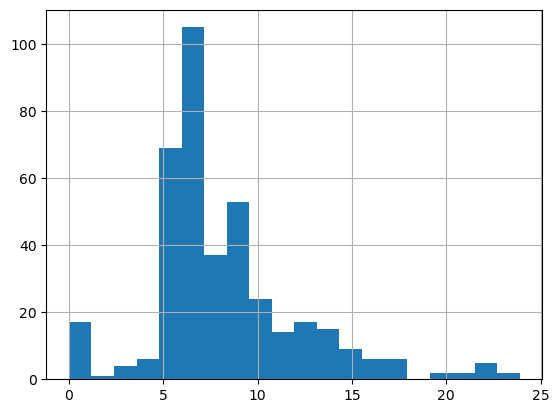

In [13]:
data.area3.hist(bins=20)

In [14]:
from sklearn.preprocessing import KBinsDiscretizer

est = KBinsDiscretizer(
    n_bins=5, encode='ordinal', strategy='uniform', subsample=None
)
est.fit(data.area3.values.reshape(-1, 1))
Xt = est.transform(data.area3.values.reshape(-1, 1))
Xt[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [15]:
data['area3_bins'] = est.transform(data.area3.values.reshape(-1, 1))

In [16]:
data.head()

,rooms,area1,area3,district,floor,total_floors,building_type,year,price,rooms_count,no_first_no_last,area3_bins
1,2,44.0,6.0,Автозаводский район,4,4,кирпич,1961.0,4900000,2.0,False,1.0
2,2,32.0,6.8,Советский район,1,3,кирпич,1958.0,4000000,2.0,False,1.0
3,2,45.0,6.0,Канавинский район,2,5,кирпич,1972.0,4300000,2.0,True,1.0
4,1,30.8,5.8,Канавинский район,2,5,кирпич,1965.0,4200000,1.0,True,1.0
5,2,48.0,9.0,Московский район,5,10,панель,2016.0,7150000,2.0,True,1.0


<Axes: >

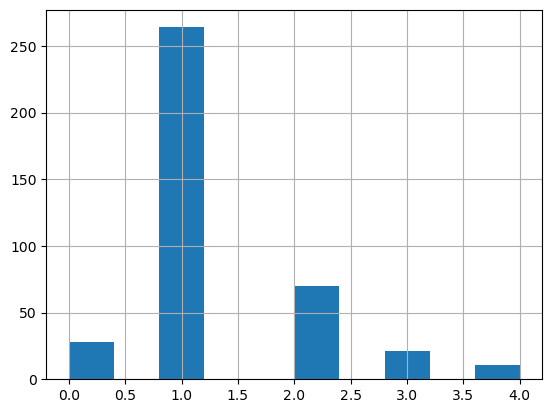

In [17]:
data.area3_bins.hist()

In [18]:
data.drop(['rooms', 'area3', 'floor', 'total_floors'], axis=1, inplace=True)

In [19]:
data.district.unique()

array(['Автозаводский район', 'Советский район', 'Канавинский район',
       'Московский район', 'Приокский район', 'дер. Анкудиновка',
       'Нижегородский район', 'Сормовский район', 'Ленинский район',
       'г. Кстово', 'пос. Ждановский', 'Новинский сельсовет',
       'г. Балахна', 'г. Бор', 'г. Арзамас', 'г. Дзержинск',
       'г. Богородск', 'рп. Ковернино', 'дер. Афонино', 'пос. Дружный',
       'пос. Буревестник', 'г. Городец', 'г. Княгинино'], dtype=object)

In [20]:
dist = [x for x in data.district.unique() if 'район' in x]
dist

['Автозаводский район',
 'Советский район',
 'Канавинский район',
 'Московский район',
 'Приокский район',
 'Нижегородский район',
 'Сормовский район',
 'Ленинский район']

In [21]:
data.loc[~data.district.isin(dist), 'district'] = 'Другой'

In [22]:
data.district.value_counts()

district
Другой                 87
Автозаводский район    81
Советский район        41
Канавинский район      36
Нижегородский район    36
Сормовский район       33
Ленинский район        29
Московский район       27
Приокский район        24
Name: count, dtype: int64

In [23]:
data.head(15)

,area1,district,building_type,year,price,rooms_count,no_first_no_last,area3_bins
1,44.0,Автозаводский район,кирпич,1961.0,4900000,2.0,False,1.0
2,32.0,Советский район,кирпич,1958.0,4000000,2.0,False,1.0
3,45.0,Канавинский район,кирпич,1972.0,4300000,2.0,True,1.0
4,30.8,Канавинский район,кирпич,1965.0,4200000,1.0,True,1.0
5,48.0,Московский район,панель,2016.0,7150000,2.0,True,1.0
6,28.0,Приокский район,кирпич,1959.0,2900000,1.0,False,1.0
7,12.7,Автозаводский район,панель,1978.0,2315000,0.8,False,0.0
8,27.6,Другой,панель,2021.0,4330000,1.0,True,0.0
9,44.8,Нижегородский район,кирпич,1971.0,6500000,2.0,False,1.0
10,59.1,Автозаводский район,панель,1963.0,6150000,3.0,False,1.0


In [26]:
data.to_csv('data/nnapartment_more_info_min.csv',index=False)

**Задание** Использовать полученный набор данных для обучения pipeline состоящего из этапов, трансформации данных, конструирования признаков, выбора признаков (понижения размерности).

Задание

1. Аккаунт на github
2. Повторить тему окружения (venv)